# Zadanie 1: optymalizacja gradientowa

Termin realizacji: 17 marca 2025

Wybierz jedną z testowych funkcji o dwóch zmiennych do optymalizacji (z [https://en.wikipedia.org/wiki/Test_functions_for_optimization](Test_functions_for_optimization)) (oprócz "sphere function", "Matyas function" i "Booth function").

Zadanie do oddania przez MS Teams. Do oddania: kod oraz krótkie sprawozdanie w PDF (można na przykład przy użyciu `quarto render notebook.ipynb --to pdf`).

## Na 3.0

Do realizacji:

1. Weź implementację optymalizacji gradientowej z zadania z ostatnich ćwiczeń.
2. Wylosuj 10 punktów z dziedziny przeszukiwania z tabelki. Dla każdego z nich przeprowadź 100 kroków optymalizacji metodą największego spadku ze stałym krokiem. Narysuj wykres zależności wartości funkcji optymalizowanej od kroku optymalizacji.
3. Przeprowadź procedurę dla kilku kroków. Spróbuj zilustrować brak zbieżności, szybką zbieżność i powolną zbieżność.

## Na 4.0

Do realizacji:

1. Punkty z zadania na 3.0.
2. Zamień stały krok z poprzedniego zadania na warunek wystarczającego spadku Armijo. Jako początkowy bracket przyjmij $[0, 1]$. Porównaj zbieżność metody o stałym kroku z przeszukiwaniem liniowym za pomocą wykresów wartości w konkretnym kroku uśrednione między poszczególnymi punktami początkowymi. Porównaj wyniki dla 6 różnych kombinacji parametrów metody Armijo.

## Na 5.0

Do realizacji:

1. Punkty z zadania na 4.0.
2. Zamień stały bracket $[0, 1]$ z poprzedniego punktu na metodę automatycznie określającą bracket (przykład z wykładu). Porównaj wyniki z poprzednią metodą dla minimum 6 zestawów parametrów bracketingu.


## 1.1 Przygotowanie funkcji

In [30]:
using LinearAlgebra
using Plots
using Random

Jako jedną z testowych funkcji dwóch zmiennych  do optymalizacji wybraliśmy Three-hump camel function, posiada 3 minima lokalne, w tym 1 globalne pośrodku.

f(x, y) - Funkcja zwracjąca wynik funkcji Three-hump camel function na podstawie podanych argumentów x i y

f_grad(x, y) - Funkcja obliczająca gradient, pochodne cząstkowe funkcji w dwóch kierunkach, zwraca listę dwuelementową, pierwszy element to pochodna cząstkowa po x, drugi po y

In [31]:

function f(vec)
    x, y = vec[1], vec[2]
    return 2 * x^2 - 1.05 * x^4 + x^6 / 6 + x*y + y^2
end

function f_grad(vec)
    x, y = vec[1], vec[2]
    return [4 * x - 4.2 * x^3 + x^5 + y, x + 2 * y]
end

f_grad (generic function with 2 methods)

## 1.2 Wizualizacja funkcji

Obliczanie wartości funkcji dla wartości x i y w przedziale [-5, 5]

In [32]:
x = -5:0.01:5
y = -5:0.01:5
z = zeros(length(x), length(y))
for i in 1:length(x)
    for j in 1:length(y)
        z[i, j] = f([x[i], y[j]])
    end
end

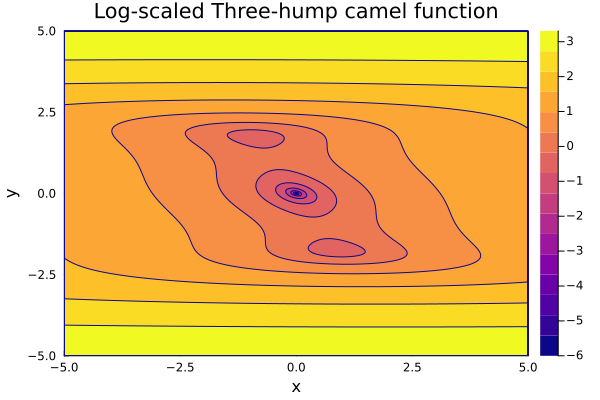

In [33]:
# Logarytmiczne skalowanie wartości funkcji w celu lepszej wizualizacji 
z_log = log10.(abs.(z) .+ 1e-6) 
contourf(x, y, z_log, fill=true, color=:plasma, xlabel="x", ylabel="y", title="Log-scaled Three-hump camel function")

# 1.3 Losowanie punktów

rand_uniform(a, b) - Funkcja losująca wartości z przedziału [a, b] 

points -  lista z 10 wylosowanymi punktami z przedziału [-5, 5] dla x i y


In [34]:
function rand_uniform(a, b)
    return rand() * (b-a) + a
end

# lista z 10 wylosowanymi punktami
points = [[rand_uniform(-5, 5), rand_uniform(-5, 5)] for i in 1:10]
points

10-element Vector{Vector{Float64}}:
 [1.6269662361189603, 2.2640234921210265]
 [-0.07832649835800698, 4.705661260823529]
 [-0.9137299447045235, 0.16903202099861492]
 [3.9469410791456863, 3.1885053379567108]
 [2.70841103854519, -3.447778555034092]
 [-0.16836078915734198, -4.481872759187372]
 [0.6882396973795455, -3.363256466415545]
 [-0.9988145329163336, -1.0755100888262268]
 [2.4548152238275156, 4.068164882916323]
 [3.83189846215784, 0.6932579242392389]

# 1.4 Metoda największego spadku

steepest_gradient_descent(cost, grad, x0, α; max_iter=100, tol=1e-6) - Funkcja implementująca algorytm metody największego spadku - szuka minimum globalnego funkcji. Zwraca znalezione wartości x i y (minimum) oraz wartości funkcji optymalizowanej dla kolejnych iteracji

Argumenty:

- cost - funkcja kosztu, w tym przypadku jest to funkcja f, której wartość minimalizujemy
- grad - gradient funkcji kosztu, w tym przykładzie jest funkcja f_grad obliczająca gradienty funkcji f
- x0 - punkt początkowy, od którego rozpoczyna się algorytm optymalizacji
- α - wartość kroku, przez który mnożony jest gradient
- max_iter - maksymalna liczba iteracji
- tol - współczynnik tolerancji, powoduje wyjście z pętli zmiany wartości funkcji kosztu są niewielkie

In [35]:
function steepest_gradient_descent(cost, grad, x0, α; max_iter=100, tol=1e-6)
    θ = copy(x0)
    f_values = []
    # f_values = zeros(max_iter)
    storage = zeros(length(θ))
    for i in 1:max_iter
        value_start = cost(θ)
        storage = grad(θ)
        norm_storage = norm(storage)
        if norm_storage == 0
            break
        end
        θ_new = θ - storage .* (α / norm_storage)
        value_stop = cost(θ_new)
        push!(f_values, value_start)
        if abs(value_stop - value_start) < tol
            break
        else
            θ = θ_new
        end
    end
    return θ, f_values
end

steepest_gradient_descent (generic function with 1 method)

## Zbieżność -  alpha = 0.01 

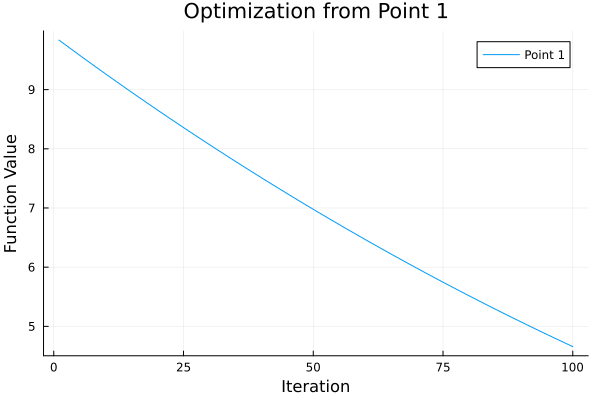

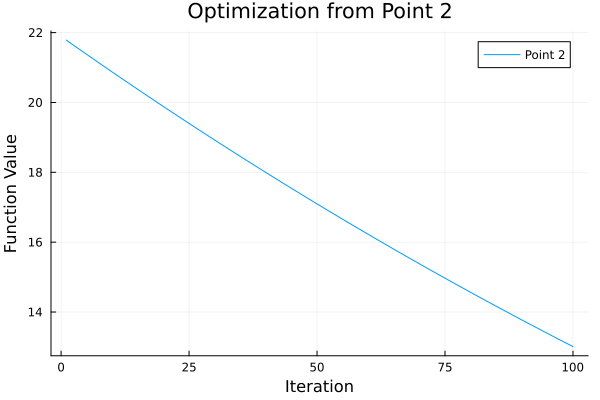

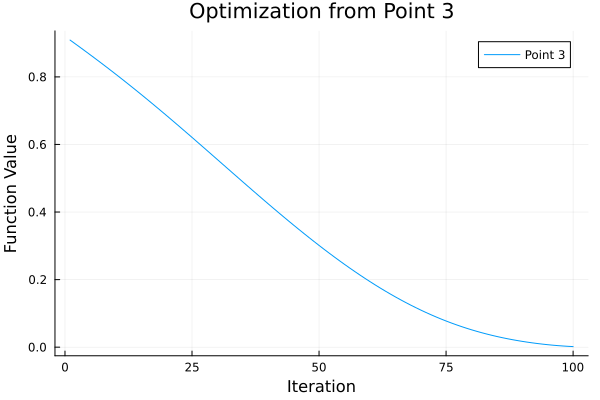

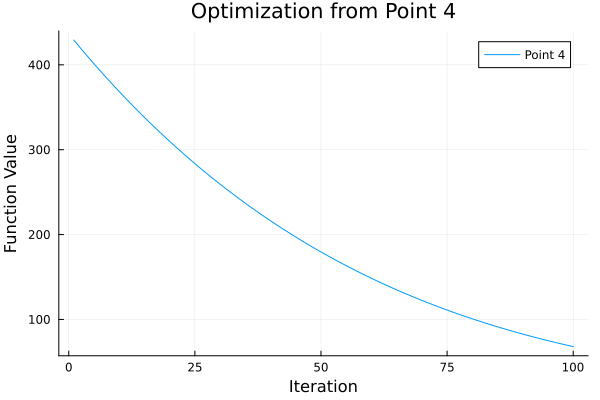

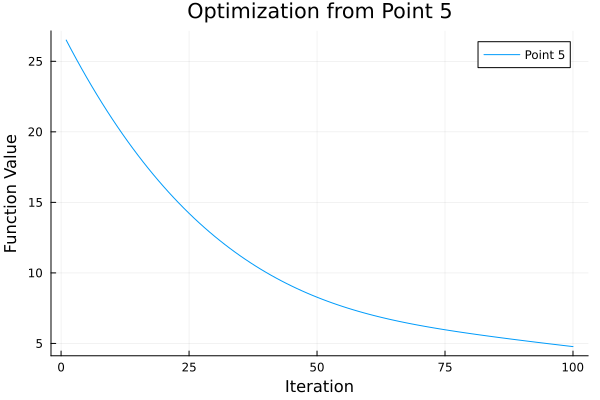

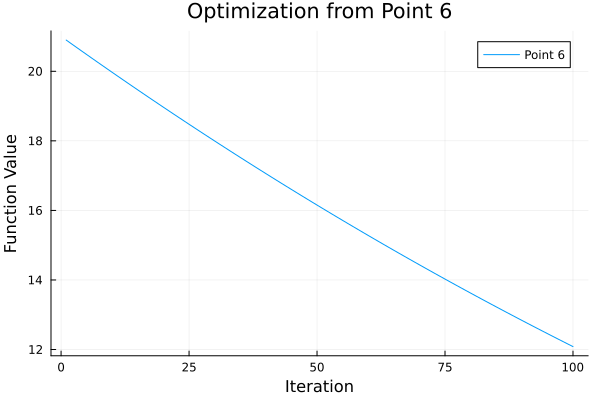

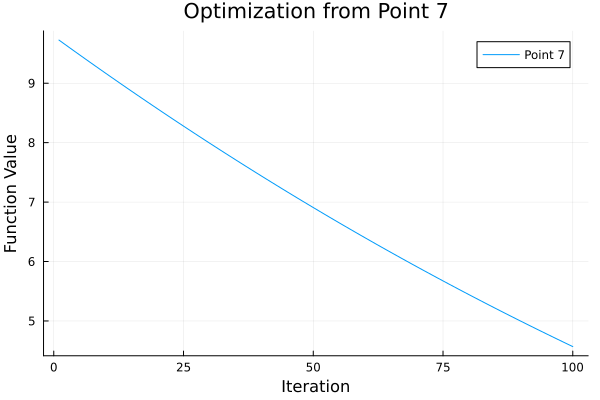

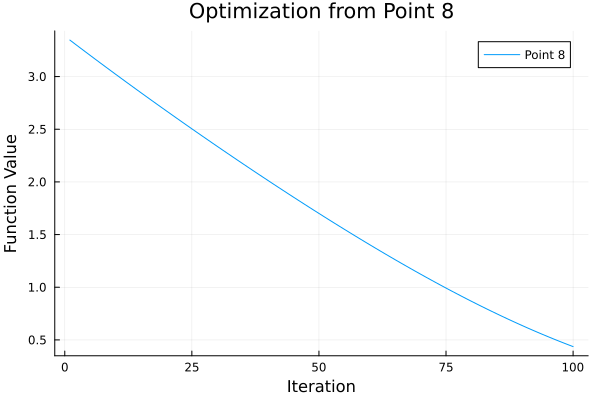

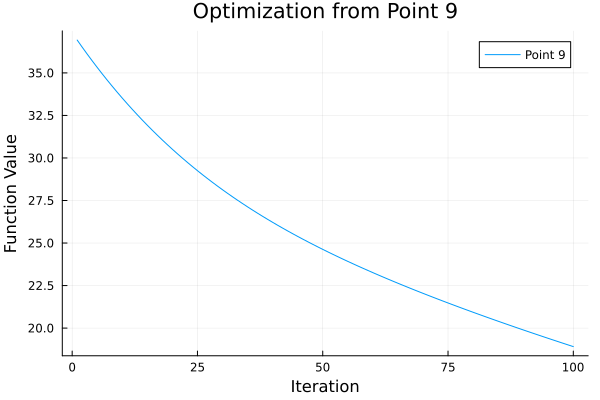

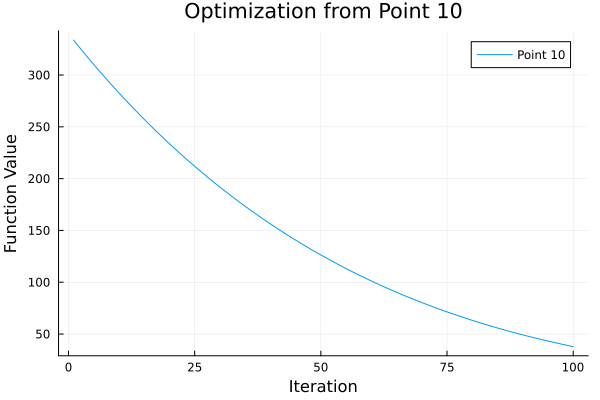

In [36]:

for i in 1:10
    θ, f_values = steepest_gradient_descent(f, f_grad, points[i], 0.01; max_iter=100)
    plot(1:length(f_values), f_values, label="Point $i")
    display(plot!(title="Optimization from Point $i", xlabel="Iteration", ylabel="Function Value"))
end

## Powolna zbieżność - alpha = 0.00001

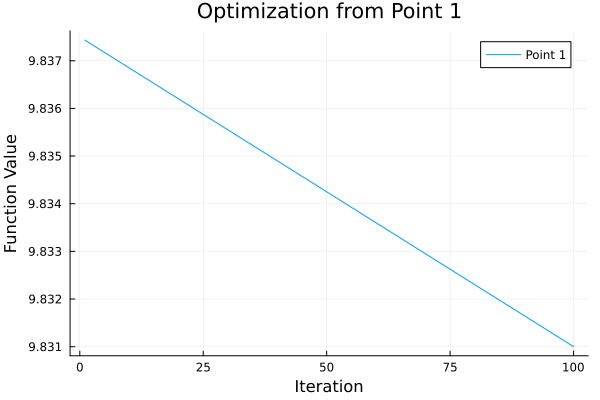

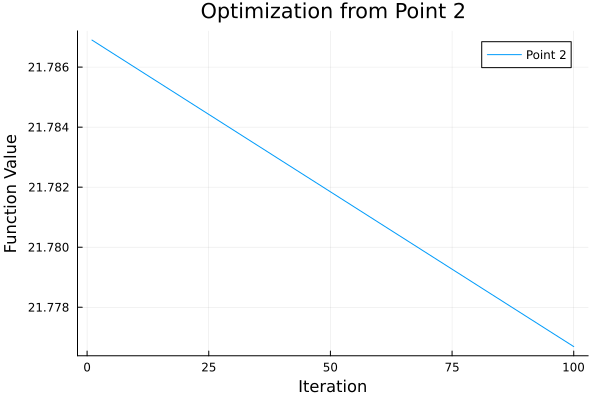

Minimum: [1.6266456992659128, 2.2630762560793585]
Minimum: [-0.07875242383706024, 4.704756502576917]
Minimum: [-0.9128818964814656, 0.1695619395727225]
Minimum: [3.9459411824682955, 3.188490963169217]
Minimum: [2.707412844105319, -3.447718489587552]
Minimum: [-0.16787067996572572, -4.481001098141347]
Minimum: [0.6885290196488157, -3.36229923466487]
Minimum: [-0.9983018382792008, -1.074651517813098]
Minimum: [2.453847227245597, 4.06791391959716]
Minimum: [3.8308984992948596, 0.6932493060810733]


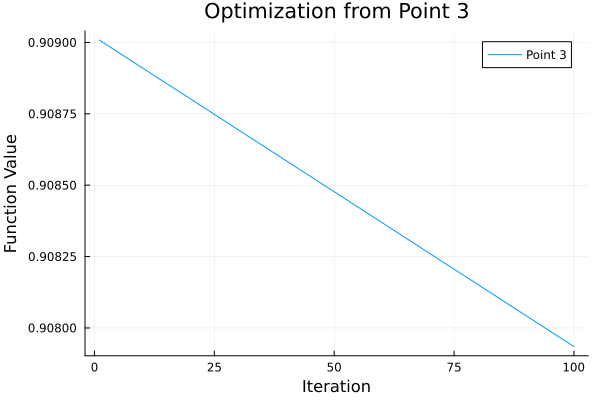

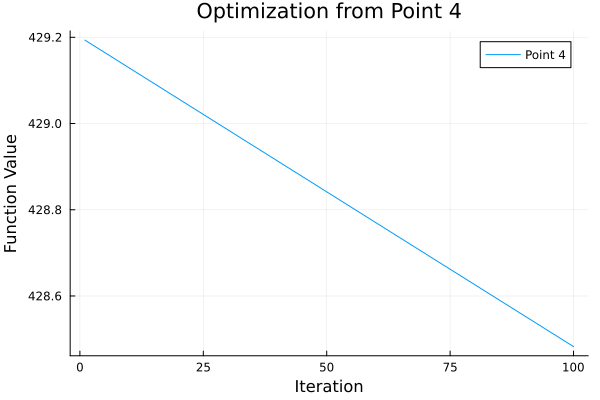

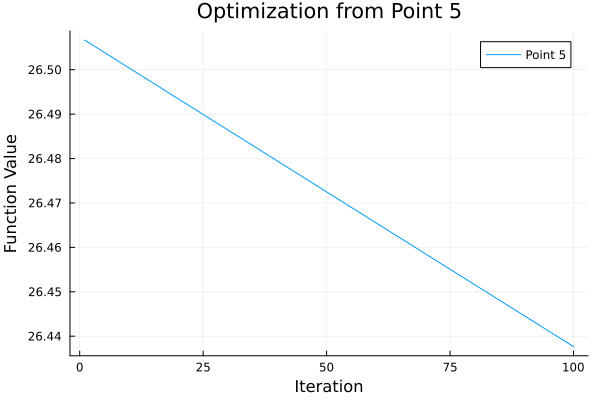

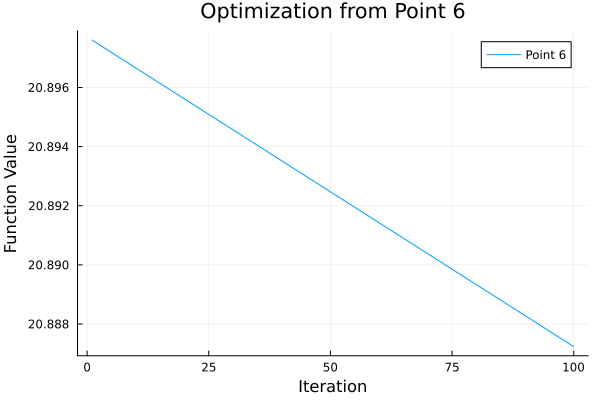

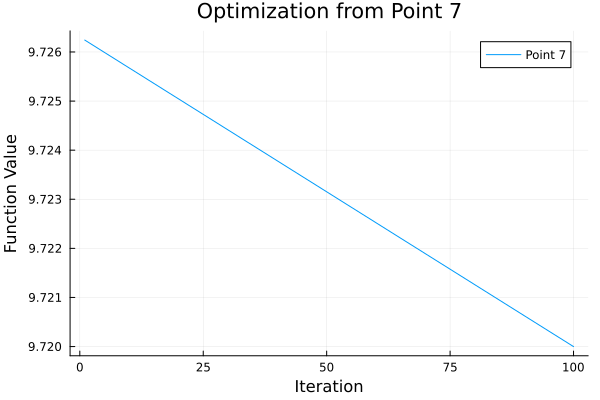

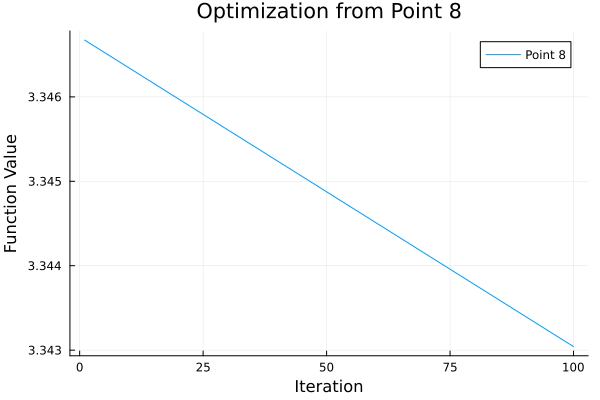

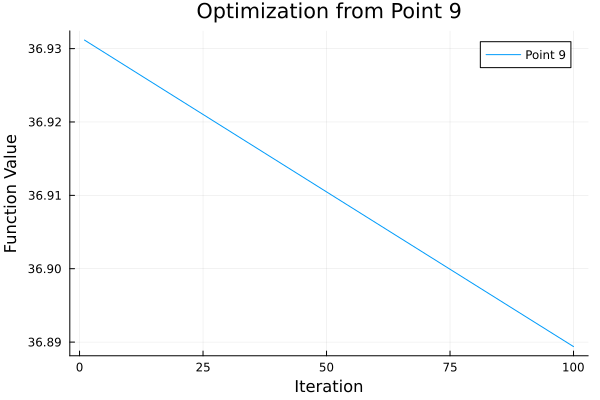

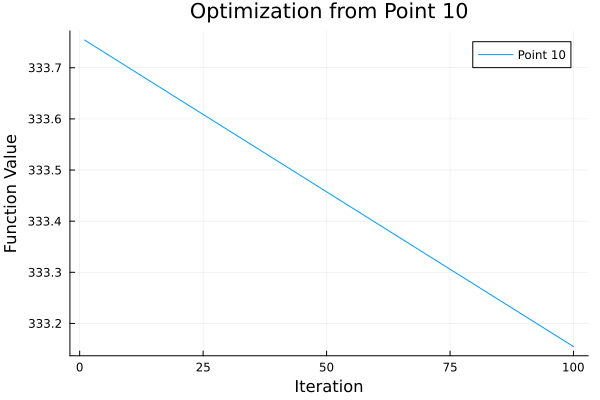

In [37]:
for i in 1:10
    θ, f_values = steepest_gradient_descent(f, f_grad, points[i], 0.00001; max_iter=100)
    plot(1:length(f_values), f_values, label="Point $i")
    display(plot!(title="Optimization from Point $i", xlabel="Iteration", ylabel="Function Value"))
    println("Minimum: ", θ)
end

## Brak zbieżności - alpha = 10

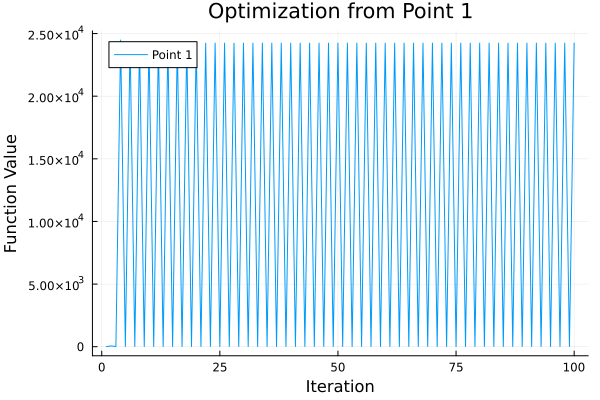

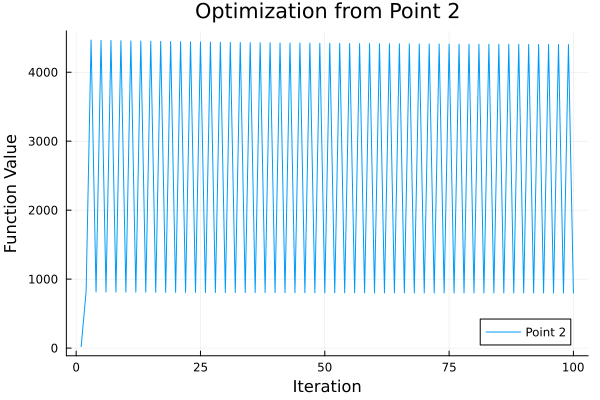

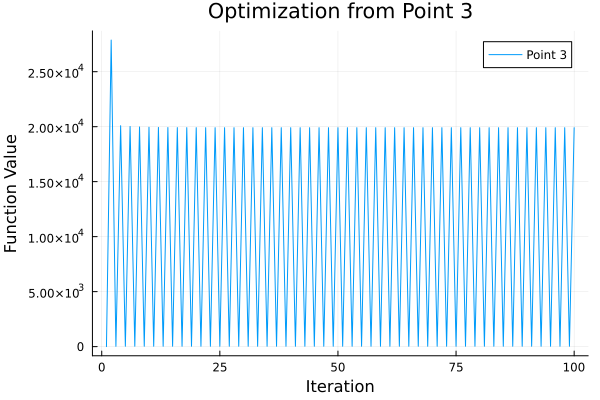

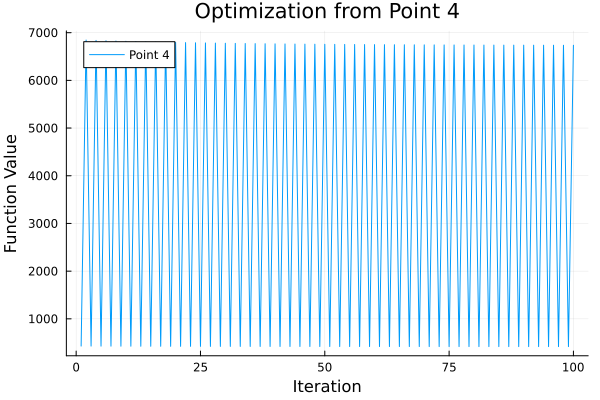

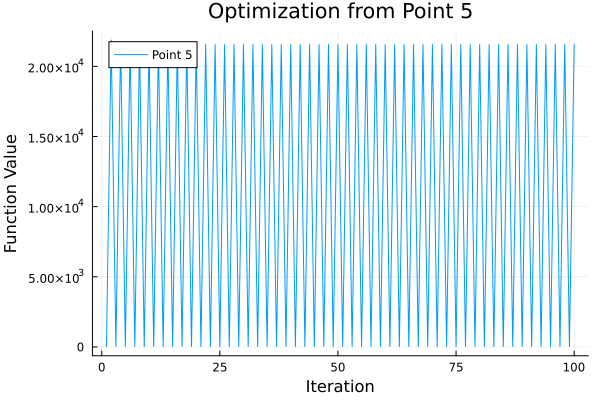

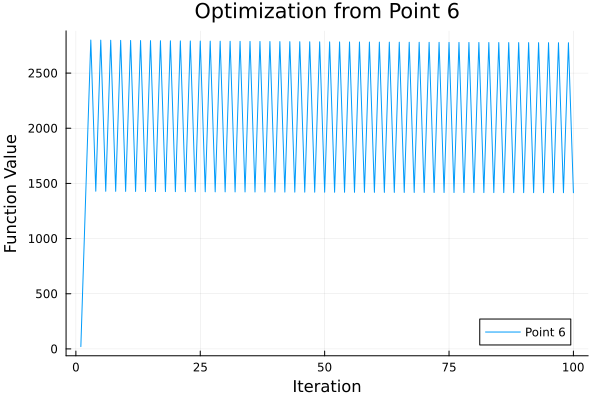

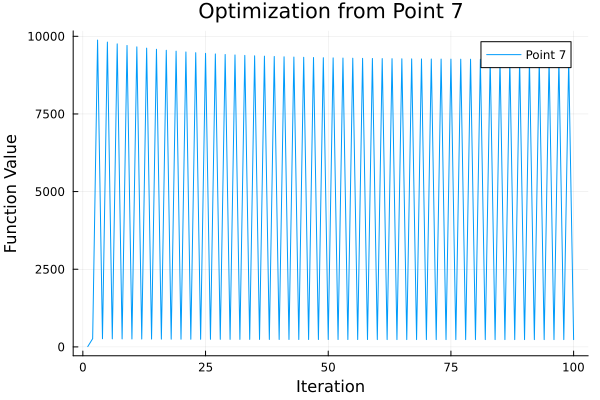

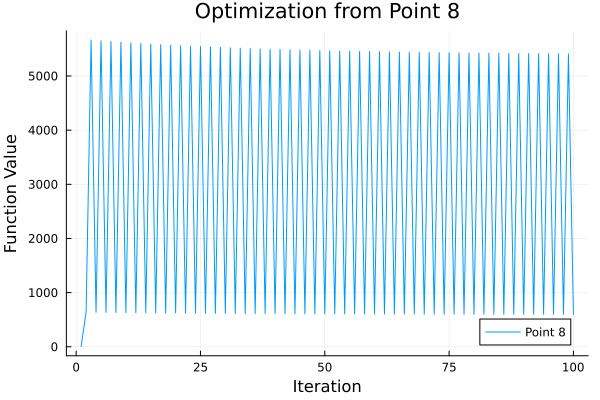

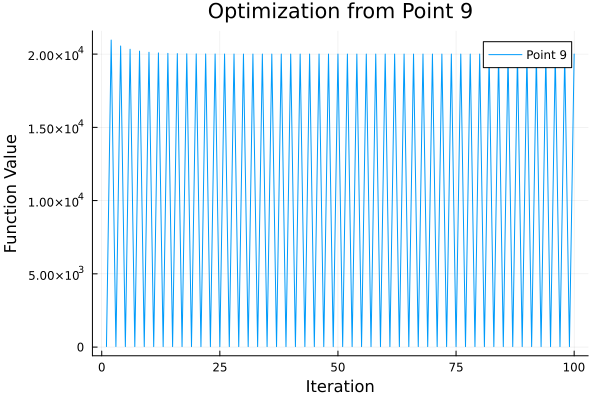

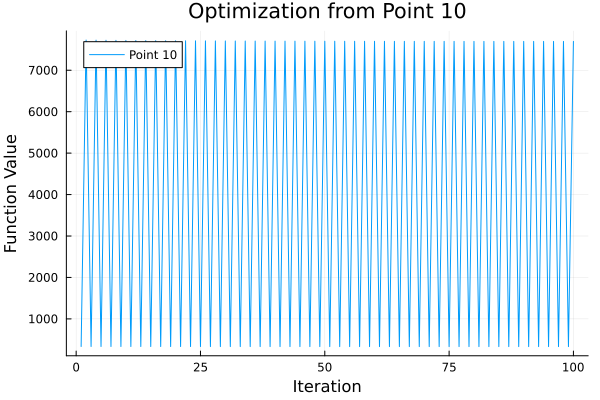

In [40]:
for i in 1:10
    θ, f_values = steepest_gradient_descent(f, f_grad, points[i], 10; max_iter=100)
    plot(1:length(f_values), f_values, label="Point $i")
    display(plot!(title="Optimization from Point $i", xlabel="Iteration", ylabel="Function Value"))
end

In [ ]:
function steepest_gradient_descent_armijo(cost, grad, x0, α, d; p=0.5, β=1e-4, max_iter=100, tol=1e-6)
    θ = copy(x0)
    f_values = []
    # f_values = zeros(max_iter)
    storage = zeros(length(θ))
    for i in 1:max_iter
        value_start = cost(θ)
        storage = grad(θ)
        norm_storage = norm(storage)
        if norm_storage == 0
            break
        end
        θ_new = θ - storage .* (α / norm_storage)
        value_stop = cost(θ_new)
        push!(f_values, value_start)
        if abs(value_stop - value_start) < tol
            break
        else
            θ = θ_new
        end
    end
    return θ, f_values
end